In [23]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [24]:
from keras.datasets import  mnist

In [25]:
(x_train,y_train) ,( x_test,y_test) = mnist.load_data()

In [26]:
len(x_train)

60000

In [35]:
x_train = x_train/255
x_test = x_test/255

In [36]:
x_train.shape

(60000, 28, 28)

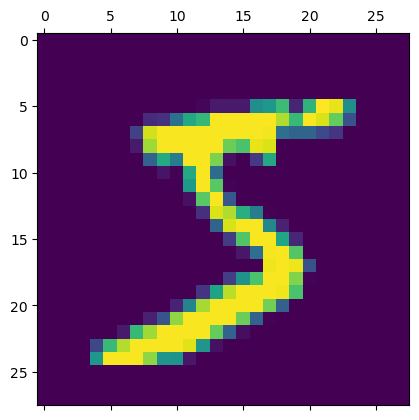

In [37]:
plt.matshow(x_train[0])

In [38]:
y_test.dtype

dtype('uint8')

In [39]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [41]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
loss="sparse_categorical_crossentropy",
metrics=['accuracy']
            )
model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5


1875/1875 [==============================] - 6s 1ms/step - loss: 2.1885 - accuracy: 0.6029
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9781 - accuracy: 0.7021
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7920 - accuracy: 0.7414
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6286 - accuracy: 0.7590
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4860 - accuracy: 0.7765


In [45]:
model.evaluate(x_test_flattened,y_test,verbose=2)

313/313 - 0s - loss: 1.4064 - accuracy: 0.8013 - 248ms/epoch - 791us/step


[1.4064111709594727, 0.8012999892234802]

In [47]:
y_predict = model.predict(x_test_flattened)

313/313 [==============================] - 0s 781us/step


In [48]:
y_predict[1]

array([0.38499027, 0.41020814, 0.61412454, 0.55492723, 0.18508194,
       0.43914667, 0.54151535, 0.15414006, 0.3970836 , 0.17967783],
      dtype=float32)

In [53]:
np.argmax(r)

3

In [52]:
r = [2,4,5,666]

In [54]:
!pip install psycopg2

                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
                                              0.0/1.2 MB ? eta -:--:--
      

In [58]:
import requests
import pandas as pd
import psycopg2
from io import StringIO
from bs4 import BeautifulSoup

# Wikipedia URL
url = 'https://en.wikipedia.org/wiki/2023_Cricket_World_Cup_statistics'

# Headers to avoid blocks by User-Agent checks
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36'
}

# Fetch the web page
response = requests.get(url, headers=headers)
if response.status_code != 200:
    print(f"Error fetching the page. Status code: {response.status_code}")
    exit()

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(response.text, 'lxml')

# Find all tables with the class "wikitable"
tables = soup.find_all('table', class_='wikitable')

# Check if tables are found
print(f"Found {len(tables)} tables.")

# Extract data from each table and store them in DataFrames


Found 42 tables.


In [ ]:
dfs = []
for i, table in enumerate(tables):
    # Convert HTML table to pandas DataFrame
    df = pd.read_html(StringIO(str(table)))[0]
    dfs.append(df)
    print(f"Table {i+1} extracted with {df.shape[0]} rows and {df.shape[1]} columns.")

# Example: Display the first DataFrame
print(dfs[0].head())

# PostgreSQL database connection details
db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'Abhi@Postgres',
    'host': 'localhost',  # Change to your database host
    'port': 5432          # Default PostgreSQL port
}

# Function to store DataFrame in PostgreSQL
def store_df_in_postgres(df, table_name, conn_params):
    try:
        # Establish connection
        conn = psycopg2.connect(**conn_params)
        cursor = conn.cursor()
        
        # Create table dynamically based on DataFrame columns
        create_table_query = f"""
        CREATE TABLE IF NOT EXISTS {table_name} (
            {', '.join([f'"{col}" TEXT' for col in df.columns])}
        );
        """
        cursor.execute(create_table_query)
        
        # Insert DataFrame into the table
        for _, row in df.iterrows():
            insert_query = f"""
            INSERT INTO {table_name} VALUES ({', '.join(['%s'] * len(row))});
            """
            cursor.execute(insert_query, tuple(row))
        
        # Commit and close the connection
        conn.commit()
        cursor.close()
        conn.close()
        print(f"Data successfully inserted into '{table_name}'.")

    except Exception as e:
        print(f"Error: {e}")

# Example: Store the first table in PostgreSQL
if dfs:
    store_df_in_postgres(dfs[0], 'cricket_world_cup_stats', db_params)


Table 1 extracted with 10 rows and 10 columns.
Table 2 extracted with 6 rows and 5 columns.
Table 3 extracted with 6 rows and 5 columns.
Table 4 extracted with 6 rows and 4 columns.
Table 5 extracted with 6 rows and 4 columns.
Table 6 extracted with 6 rows and 4 columns.
Table 7 extracted with 7 rows and 4 columns.
Table 8 extracted with 6 rows and 4 columns.
Table 9 extracted with 6 rows and 4 columns.
Table 10 extracted with 6 rows and 4 columns.
Table 11 extracted with 6 rows and 4 columns.
Table 12 extracted with 6 rows and 5 columns.
Table 13 extracted with 6 rows and 5 columns.
Table 14 extracted with 8 rows and 9 columns.
Table 15 extracted with 6 rows and 8 columns.
Table 16 extracted with 6 rows and 13 columns.
Table 17 extracted with 6 rows and 9 columns.
Table 18 extracted with 6 rows and 10 columns.
Table 19 extracted with 6 rows and 6 columns.
Table 20 extracted with 8 rows and 6 columns.
Table 21 extracted with 8 rows and 3 columns.
Table 22 extracted with 6 rows and 6 co